In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


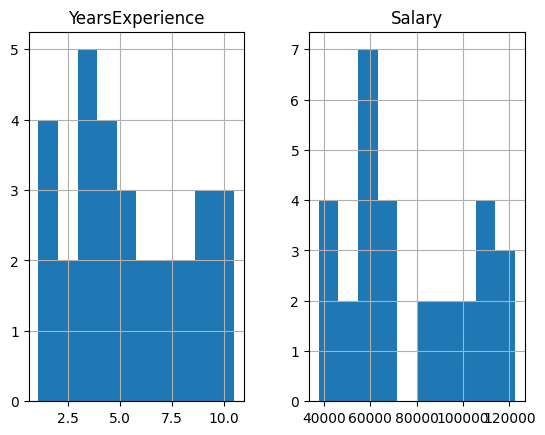

In [5]:
vis = df[['YearsExperience', 'Salary']]
vis.hist()
plt.show()

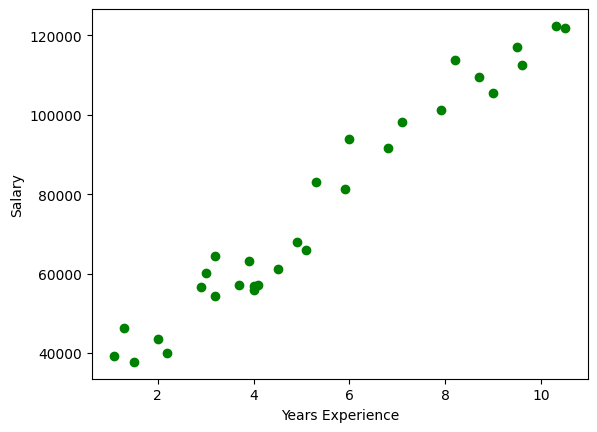

In [7]:
plt.scatter(df.YearsExperience, df.Salary, color='green')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

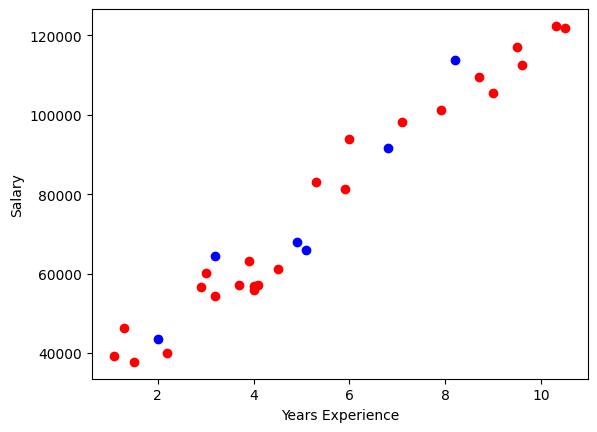

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.YearsExperience, train.Salary, color='red')
ax1.scatter(test.YearsExperience, test.Salary, color='blue')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)
print("Coefficient is ", regr.coef_)
print("Intercept is ", regr.intercept_)

Coefficient is  [[9344.31373653]]
Intercept is  [26054.90271835]


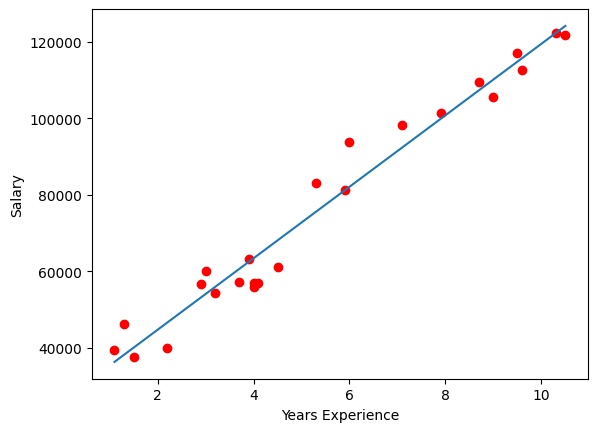

In [30]:
plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(df[['YearsExperience']])
test_y = np.asanyarray(df[['Salary']])
predicted_y = regr.predict(test_x)

print('Mean absolute error is %.2f' %np.mean(np.absolute(predicted_y - test_y)))
print('MSE is %.2f' %np.mean((predicted_y - test_y)**2))
print('R2 score is %.2f' %r2_score(test_y, predicted_y))

Mean absolute error is 4645.66
MSE is 31447034.71
R2 score is 0.96


In [36]:
years = float(input("How many years do you work? "))
print('your estimated salary is %.2f' %regr.predict(np.asanyarray([[years]])))

How many years do you work? 20
your estimated salary is 212941.18
